<a id='top'></a>

# CSCI 3022: Intro to Data Science - Fall 2019 Practicum 2
***

This practicum is due on Canvas by **11:59 PM on Wednesday December 11**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
1. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
1. This is meant to be like a coding portion of your midterm exam. So, the instructional team will be much less helpful than we typically are with homework. For example, we will not check answers, help debug your code, and so on.
1. If something is left open-ended, it is because we want to see how you approach the kinds of problems you will encounter in the wild, where it will not always be clear what sort of tests/methods should be applied. Feel free to ask clarifying questions though.
2. You may **NOT** post to message boards or other online resources asking for help.
3. You may **NOT** copy-paste solutions *from anywhere*.
4. You may **NOT** collaborate with classmates or anyone else.
5. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on this practicum or an F in the course, depending on severity), and a trip to the Honor Code Council.

**By submitting this assignment, you agree to abide by the rules given above.**

***

**Name**:  Joshua Achorn

***


**NOTES**: 

- You may not use late days on the practicums nor can you drop your practicum grades. 
- If you have a question for us, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class, then we will add it to a Practicum clarifications thread. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Bottom](#bot)

---

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math

from calendar import month_name, different_locale
from scipy import stats
import statsmodels.api as sm
from scipy.special import binom

<br>

---
<a id='p1'></a>
[Back to top](#top)

### [40 points] Problem 1:  Amazon Forest Fires

A non-profit orgranization is trying to protect the Amazon rain forest and has recruited you as their head data scientist. For your first task, they've given you a dataset with the number of fires in each state in the Amazon region during each month between 1998 and 2017. They would like to have a 95% confidence interval for the true median number of forest fires that occur in each state on a yearly basis. 

In [5]:
#Starter Code
df = pd.read_csv('amazon.csv', thousands='.', decimal ='/', engine='python')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
year      6453 non-null object
state     6452 non-null object
month     6454 non-null object
number    6448 non-null float64
date      6450 non-null object
dtypes: float64(1), object(4)
memory usage: 252.2+ KB


,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


**Part A:**  This dataset isn't paticularly useful in it's current state, so we'll need to clean it up a bit. Some data scientists say that most of their job is to wrangle data, so this will give you a taste of cleaning a real world data set. Perform the following tasks:
1. Drop the 'date' column. The only information this column holds is the year, which we already have in another column. 
2. Drop any rows with null values in any of the remaining columns
3. Print all the unique values of the 'month' column. You'll notice that one is encoded with a differant character encoding then the format that pandas is using.
3. Convert the Portugese month names to English month names. We've included the 'month_name' and the 'different_encoding' modules of the python calendar library in the top cell above, if you would like to use them. There are many ways to accomplish this task, and these modules are not required, but may make things easier. As part of this step, you should make sure that the Portugese month with the encoding problem is translated to the correct English month. 
4. Check the number column for any values that seem impossible. Drop any negative or fractional values, or any values over 50,000. 50,000 is large enough that no Brazilian state would ever have that many forest fires in one month, so we should get rid of anything above 50000. 
5. Since you're new on the job, some of your co-workers may have played a prank on you... Print out all the unique values of the 'year' column and drop any rows with values that don't make sense.
6. Find the total number of rows remaining after you've done all of the above and write it out in a markdown cell. if you have correctly performed all of the tasks above, your dataframe should now have 6438 rows.

**NOTE:** Since some of these tasks are not totally trivial, you may use any resources other than your classmates on this part of this problem. This means you may consult google, stack overflow, the python/pandas documentation, some random book on pandas you might have, etc... But you may not consult your classmates for help. ***CITE ALL RESOURCES USED IN A CODE COMMENT. A URL OR A BOOK TITLE IS SUFFICIENT. ANY CODE OBIVOUSLY COPIED FROM OUTSIDE SOURCES WITH OUT A CITATION WILL EARN YOU NO CREDIT ON THIS PROBLEM. YOU ARE ALLOWED TO USE THESE RESOURCES ONLY ON THIS PART OF THIS PROBLEM!***

In [6]:
#Your code here
#1
dfClean = df.drop('date', axis=1)
print(len(dfClean))

#2
dfClean = dfClean.dropna()
len(dfClean)

#3
dfClean.month.unique()

#4
# dfClean = dfClean['month'].replace(['Janeiro','January'])
dfClean.month.replace('Janeiro','January',inplace=True)
dfClean.month.replace('Fevereiro','February',inplace=True)
dfClean.month.replace('Mar�o','March',inplace=True)
dfClean.month.replace('Abril','April',inplace=True)
dfClean.month.replace('Maio','May',inplace=True)
dfClean.month.replace('Junho','June',inplace=True)
dfClean.month.replace('Julho','July',inplace=True)
dfClean.month.replace('Agosto','August',inplace=True)
dfClean.month.replace('Setembro','September',inplace=True)
dfClean.month.replace('Outubro','October',inplace=True)
dfClean.month.replace('Novembro','November',inplace=True)
dfClean.month.replace('Dezembro','December',inplace=True)

print('Unique Months: \n',dfClean.month.unique())
#5
dfClean = dfClean[(dfClean['number'] >= 0) & (dfClean['number'] <= 50000)]
len(dfClean)

def dFilter(c, f, ds):
    counter = 0 
    index = []
    for d in ds:
        v = f(d)
        if(c(v)):
            index.append(counter)
        counter += 1
    return index

dfClean = dfClean.drop(dfClean.index[dFilter(lambda val : val > 0, lambda b : b -int(b), np.array(dfClean['number']))])


#6
print("\nUnique Years: \n",dfClean.year.unique())
yearMatch = r'[0-9]{4}'
dfClean = dfClean[dfClean.year.str.contains(yearMatch)]
dfClean = dfClean.drop(dfClean.index[dFilter(lambda str_len: str_len > 4 or str_len < 4, lambda a : len(a), np.array(dfClean['year']))])
dfClean.year.unique()
#7

print("\nLength of Data Frame:",len(dfClean))


6454
Unique Months: 
 ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']

Unique Years: 
 ['1998' '1999' '2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007'
 '2008' '2009' '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017'
 '1000bc' '-40' '10bc' "our new data scientist won't notice this"]

Length of Data Frame: 6438


**Part B:** Extract the median number of forest fires per month, yearly, by state. Store these median values in the given python dictionary.

For Example:

If one year of one state had the following numbers of fires:

Jan: 1

Feb: 2

Mar: 3

Apr: 4

May: 5

Jun: 6

Jul: 7

Aug: 8

Sep: 9

Oct: 10

Nov: 11

Dec: 12

Then the median number of forest fires per month would be 6.5 (the average of the two middle elements since this has an even length)

If the state of "test" had 5 years of recorded data, with the following median forest fire values: \[1, 2, 7, 9, 3\],  then python dictionary should look like: 

\{

    "test": [1, 2, 7, 9, 3]
    
\}

Below we've given you one of the states values in a test, so you can ensure you are calculating the medians correctly.

In [7]:
#GIVEN DICTIONARY CODE
median_num_fires_monthly_yearly = {
    'Acre': None,
    'Alagoas': None,
    'Amapa': None,
    'Amazonas': None,
    'Bahia': None,
    'Ceara': None,
    'Distrito Federal': None,
    'Espirito Santo': None,
    'Goias': None,
    'Maranhao': None,
    'Mato Grosso': None,
    'Minas Gerais': None,
    'Para': None,
    'Paraiba': None,
    'Pernambuco': None,
    'Piau': None,
    'Rio': None,
    'Rondonia': None,
    'Roraima': None,
    'Santa Catarina': None,
    'Sao Paulo': None,
    'Sergipe': None,
    'Tocantins': None  
}

In [8]:
# Your code here
dfClean.head(30)



def fillDic(dic):
    for key in dic:
#         print(key)
        mList = []
        for year in range(1998,2018):
#             print(year)
            
            med = dfClean[(dfClean['year'] == str(year)) & (dfClean['state'] == key)].number.median()
            mList.append(med)
        dic[key] = mList

fillDic(median_num_fires_monthly_yearly)
# print(median_num_fires_monthly_yearly)

In [9]:
#Given Test
assert median_num_fires_monthly_yearly['Acre'] == \
[1.5, 0.0, 1.0, 0.5, 1.0, 8.0, 7.0, 13.0, 6.0, 4.5, 0.0, 2.5, 6.0, 7.0, 5.0, 13.5, 12.0, 24.0, 33.5, 45.0] \
, "something is wrong here"

In [10]:
#DONT CHANGE THIS. WE USE IT TO MAKE THE OUTPUT LEGIBLE FOR GRADING
import pprint
pp = pprint.PrettyPrinter(indent=1)
pp.pprint(median_num_fires_monthly_yearly)

{'Acre': [1.5,
          0.0,
          1.0,
          0.5,
          1.0,
          8.0,
          7.0,
          13.0,
          6.0,
          4.5,
          0.0,
          2.5,
          6.0,
          7.0,
          5.0,
          13.5,
          12.0,
          24.0,
          33.5,
          45.0],
 'Alagoas': [0.0,
             4.0,
             7.5,
             3.0,
             13.0,
             12.5,
             6.5,
             11.5,
             8.0,
             4.5,
             18.0,
             21.5,
             10.5,
             20.0,
             24.5,
             14.5,
             12.5,
             36.0,
             13.5,
             8.5],
 'Amapa': [0.0,
           1.5,
           1.0,
           0.5,
           5.0,
           8.0,
           7.0,
           3.0,
           4.0,
           0.0,
           2.0,
           4.0,
           2.0,
           4.0,
           13.0,
           2.5,
           7.0,
           9.5,
           12.0,
           3.0

**Part C:** Since we cannot rely on the central limit thereom for the median, we'll bootstrap some samples. Bootstrap 1000 samples for each state. Each bootstrapped sample should have 50 values drawn from the original sample.

Find the median of each bootstrapped sample, and add it to a list. Save the list of median values for the states of **Sao Paulo** and **Goias**. We'll use them later to plot in part D. Then determine the 95% confidence interval of the true median from each list of bootstrapped medians for each state. Add a list of the low and high values of the confidence interval to the given python dictionary below. To help you check your work, the confidence interval of the state of Acre should be from roughly 4 to 7. Your values will change though, because each bootstrapped sample is picked randomly from the original.

For Example:

If the 95% confidence interval on the median is from 6 to 22 for the state of "test", then the dictionary would look like:

{

    "test": [6, 22]
    
}

In [11]:
#GIVEN CODE
median_num_fires_bootstrap = {
    'Acre': None,
    'Alagoas': None,
    'Amapa': None,
    'Amazonas': None,
    'Bahia': None,
    'Ceara': None,
    'Distrito Federal': None,
    'Espirito Santo': None,
    'Goias': None,
    'Maranhao': None,
    'Mato Grosso': None,
    'Minas Gerais': None,
    'Para': None,
    'Paraiba': None,
    'Pernambuco': None,
    'Piau': None,
    'Rio': None,
    'Rondonia': None,
    'Roraima': None,
    'Santa Catarina': None,
    'Sao Paulo': None,
    'Sergipe': None,
    'Tocantins': None  
}

In [12]:
#Your code here.
# print(median_num_fires_monthly_yearly)
savedMeds={'Sao Paulo': None, 'Goias' : None }

def bsSamp(dic, dic2):
    for state in dic:
        bList = []
        for i in range(1000):
            rand = np.random.choice(dic[state], 50, replace=True)
            med = np.median(rand)
            bList.append(med)
        if state in savedMeds:
            savedMeds[state] = bList
        L, U = np.percentile(bList, 2.5), np.percentile(bList, 97.5)
        CI = np.array([L, U])
        dic2[state] = CI
        print(state ,': [', CI[0], ',' , CI[1] , ']')

bsSamp(median_num_fires_monthly_yearly, median_num_fires_bootstrap)


Acre : [ 4.5 , 7.0 ]
Alagoas : [ 8.5 , 13.0 ]
Amapa : [ 2.5 , 4.0 ]
Amazonas : [ 57.5 , 107.5 ]
Bahia : [ 233.5 , 278.53125 ]
Ceara : [ 38.0 , 65.0 ]
Distrito Federal : [ 1.5 , 2.25 ]
Espirito Santo : [ 8.5 , 11.0 ]
Goias : [ 98.0 , 166.5 ]
Maranhao : [ 620.5 , 813.0 ]
Mato Grosso : [ 388.0 , 557.0687499999999 ]
Minas Gerais : [ 136.0 , 168.25 ]
Para : [ 471.5 , 679.0 ]
Paraiba : [ 45.5 , 58.0 ]
Pernambuco : [ 21.5 , 30.5 ]
Piau : [ 193.0 , 308.0 ]
Rio : [ 22.5 , 29.5 ]
Rondonia : [ 41.0 , 116.0 ]
Roraima : [ 44.5 , 72.5 ]
Santa Catarina : [ 29.0 , 43.0 ]
Sao Paulo : [ 111.5 , 146.5 ]
Sergipe : [ 1.5 , 5.0 ]
Tocantins : [ 170.47500000000002 , 337.0 ]


In [13]:
#DONT CHANGE THIS. WE USE IT TO MAKE THE OUTPUT LEGIBLE FOR GRADING
import pprint
pp = pprint.PrettyPrinter(indent=1)
pp.pprint(median_num_fires_bootstrap)

{'Acre': array([4.5, 7. ]),
 'Alagoas': array([ 8.5, 13. ]),
 'Amapa': array([2.5, 4. ]),
 'Amazonas': array([ 57.5, 107.5]),
 'Bahia': array([233.5    , 278.53125]),
 'Ceara': array([38., 65.]),
 'Distrito Federal': array([1.5 , 2.25]),
 'Espirito Santo': array([ 8.5, 11. ]),
 'Goias': array([ 98. , 166.5]),
 'Maranhao': array([620.5, 813. ]),
 'Mato Grosso': array([388.     , 557.06875]),
 'Minas Gerais': array([136.  , 168.25]),
 'Para': array([471.5, 679. ]),
 'Paraiba': array([45.5, 58. ]),
 'Pernambuco': array([21.5, 30.5]),
 'Piau': array([193., 308.]),
 'Rio': array([22.5, 29.5]),
 'Rondonia': array([ 41., 116.]),
 'Roraima': array([44.5, 72.5]),
 'Santa Catarina': array([29., 43.]),
 'Sao Paulo': array([111.5, 146.5]),
 'Sergipe': array([1.5, 5. ]),
 'Tocantins': array([170.475, 337.   ])}


**Part D:** Plot a histogram of the frequency of different median values for the two states **Sao Paulo** and **Goias**. Overlay these histograms on the same plot. Include axis labels, a title, a legend, etc. Choose two colors that work well together and provide enough contrast (e.g. No one can see gold overlayed with yellow), and use reasonable values of the **alpha** parameter so you can see both histograms. Plot two vertical lines that represent the outer bounds of the 95% confidence interval on the true median for each state, in the same color as the state. Does the data for the median look normally distributed? Why or why not? Does this validate our decision to not use the central limit theorem and instead bootstrap our median samples? Explain in a markdown cell below.

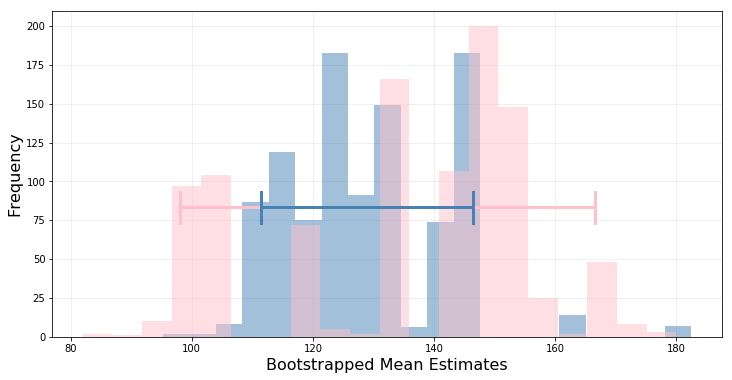

In [14]:
#Your code here.
num_boots = 1000
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
pd.Series(savedMeds['Sao Paulo']).hist(ax=ax, color="steelblue", bins=20, density=False, alpha = 0.5)
pd.Series(savedMeds['Goias']).hist(ax=ax, color="pink", bins=20, density=False, alpha = 0.5)
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.set_xlabel("Bootstrapped Mean Estimates", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16)

CIS = median_num_fires_bootstrap['Sao Paulo']
CIG = median_num_fires_bootstrap['Goias']


ax.plot([CIG[0], CIG[1]], [num_boots/12, num_boots/12], color="pink", lw=3)
ax.plot([CIG[0], CIG[0]], [num_boots/12-10, num_boots/12+10], color="pink", lw=3)
ax.plot([CIG[1], CIG[1]], [num_boots/12-10, num_boots/12+10], color="pink", lw=3)
ax.plot([CIS[0], CIS[1]], [num_boots/12, num_boots/12], color="steelblue", lw=3)
ax.plot([CIS[0], CIS[0]], [num_boots/12-10, num_boots/12+10], color="steelblue", lw=3)
ax.plot([CIS[1], CIS[1]], [num_boots/12-10, num_boots/12+10], color="steelblue", lw=3)



<br>

---
<a id='p2'></a>
[Back to top](#top)

### [40 points] Problem 2:  Sharknado Prediction

Governor Hickenlooper has charged you with the task of assessing the factors associated with sharknado risk in Colorado. As everyone knows, sharknadoes are a leading cause of sharknado-related illness, and you are a world-renowned data/shark scientist.

You decide to use multiple linear regression to understand and predict what factors lead to increased sharknado hazard. Your lead scientist, aptly named Fin, has collected lots of relevant data at a local sharknado hotspot, the Boulder Reservoir[\*](#footnote). The data cover a variety of sharknado-related environmental and other conditions, and you'll find this data in the file `sharknadoes.csv`. 

**Response**: 

- $\texttt{sharknado hazard}$: the hazard of a sharknado, where 1 is very unlikely and 100 is highly likely

**Features**: 

- $\texttt{taunts}$: the number of times over the past year that someone has taunted a shark
- $\texttt{clouds}$: what percentage of the sky was covered by clouds (fraction, 0-1)
- $\texttt{precipitation}$: amount of precipitation in the past 72 hours (inches)
- $\texttt{earthquake}$: the intensity of the most recent earthquake measured in the continental United States
- $\texttt{shark attacks}$: the number of shark attacks within 72 hours prior to the observation
- $\texttt{ice cream sold}$: the number of units of ice cream sold at the beach concession stand 
- $\texttt{misery index}$: an economic indicator for how miserable the average United States citizen is, based on the unemployment rate and the inflation rate. More [here](https://www.stuffyoushouldknow.com/podcasts/whats-the-misery-index.htm) and [here](https://en.wikipedia.org/wiki/Misery_index_(economics)). Higher values correspond to more miserable citizens.
- $\texttt{temperature}$: the outside temperature, measured in degrees Fahrenheit
- $\texttt{humidity}$: relative humidity (percent, 0-100)
- $\texttt{pizzas sold}$: the number of pizzas sold at the beach concession stand in the past year
- $\texttt{pressure}$: local air pressure (millibar) 
- $\texttt{octopuses}$: the number of octupuses in the vicinity on the day of the observation
- $\texttt{Zach's shoe size}$: the size of the shoes Zach was wearing when the observation was made
- $\texttt{Rachel's shoe size}$: the size of the shoes Rachel was wearing when the observation was made

**Part A**: Read the data from `sharknadoes.csv` into a Pandas DataFrame.  Note that since we will be doing a multiple linear regression we will need all of the features. To make sure the data is "clean", drop any row in the DataFrame that is missing data. 

In [15]:
#Your code here.
df = pd.read_csv('sharknadoes.csv')
dfClean = df.dropna()
dfClean.head()

,clouds,earthquake,pizzas sold,taunts,pressure,shark attacks,octopuses,precipitation,misery index,ice cream sold,humidity,temperature,Zachs shoe size,Rachels shoe size,sharknado hazard
0,1.00,7.1,5560.0,15.0,847.12,2.0,7.0,0.824059,12.987180,273.0,86.41,78.0,42.0,9.0,40.22
1,1.00,7.4,5179.0,20.0,844.34,4.0,5.0,0.993296,16.765435,184.0,96.67,89.0,42.0,9.5,36.42
2,1.00,7.0,5227.0,0.0,839.48,9.0,2.0,1.173342,16.494518,141.0,53.85,65.0,9.5,9.0,19.54
3,0.13,7.9,5226.0,34.0,851.28,2.0,6.0,0.919291,8.277176,146.0,88.72,36.0,9.5,10.0,85.00
4,1.00,7.5,5491.0,6.0,852.67,2.0,4.0,1.729127,5.904750,178.0,63.08,72.0,42.0,9.0,56.34


**Part B**: Perform the appropriate statistical test at the $\alpha = 0.025$ significance level to determine if _at least one_ of the features is related to the the response $y$.  Clearly describe your methodology and show all computations in Python. 

In [16]:
#Your code here.

y, X = dfClean['sharknado hazard'],dfClean.iloc[:,:-1]
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       sharknado hazard   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     179.4
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           9.60e-42
Time:                        18:06:05   Log-Likelihood:                -174.23
No. Observations:                  72   AIC:                             378.5
Df Residuals:                      57   BIC:                             412.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2549.8985     67.60

$H_0$ = it is unlikely that the ft is related to a sharknado occuring

$H_a$ = Likely that ft is related to a sharknado occuring

**Part C**: Write a function `backward_select(df, resp_str, maxsse)` that takes in the DataFrame (`df`), the name of the column corresponding to the response (`resp_str`), and the maximum desired sum of squared errors (`maxsse`), and returns a list of feature names corresponding to the most important features via backward selection.  Use your code to determine the reduced MLR model with the minimal number of features such that the SSE of the reduced model is less than 570. At each stage in backward selection you should remove the feature that has the highest p-value associated with the hypothesis test for the given slope coefficient $\beta_k \neq 0$.

Your code should clearly indicate which feature was removed in each stage, and the SSE associated with the model fit before the feature's removal. _Specifically, please write your code to print the name of the feature that is going to be removed and the SSE before its removal_. Afterward, be sure to report all of the retained features and the SSE of the reduced model.

**Note**: The point of this exercise is to see if you can implement **backward_select** yourself.  You may of course use canned routines like statmodels OLS, but you may not call any Python method that explicitly performs backward selection.

In [19]:
def backward_select(df, resp_str, maxsse):
    #Your code here.
    preDf = None
    while True:
        y, X = df[resp_str], df.iloc[:,:-1]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        
        
        y_hat = None
        counter = 0
        for key in X.keys():
            if(key == 'const'):
                y_hat = X['const'] * model.params[counter]
            else:
                y_hat += (model.params[counter] * X[key])
            counter += 1
        sse = 0
        y_i = np.array(y)
        y_hat = np.array(y_hat)
        for i in range(len(y_i)):
            sse += (y_i[i] - y_hat[i])**2
        
        if(sse >= maxsse):
            return prev_df
        pval = list(model.pvalues)
        drop_key = X.keys()[pval.index(max(pval))]
        print("Drop", drop_key, "with SSE", sse)
        prev_df = df
        df = df.drop([drop_key], axis = 1)

**Part D**: Write down the final multiple linear regression model, including estimated parameters, obtained by your backward selection process. 

In [20]:
#Your code here.
newDf = backward_select(dfClean, 'sharknado hazard', 570)
y , X = newDf['sharknado hazard'], newDf.iloc[:,:-1]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())
print(model.params)

Drop Rachels shoe size with SSE 532.943670740439
Drop misery index with SSE 533.4003410558859
Drop octopuses with SSE 534.6875698945762
Drop clouds with SSE 536.5069911256511
Drop pizzas sold with SSE 539.4965616357625
Drop humidity with SSE 543.3572004721018
Drop shark attacks with SSE 547.4141982866453
Drop Zachs shoe size with SSE 552.1548653819108
Drop ice cream sold with SSE 564.1068895239317
                            OLS Regression Results                            
Dep. Variable:       sharknado hazard   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     450.3
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           6.28e-51
Time:                        18:06:23   Log-Likelihood:                -176.27
No. Observations:                  72   AIC:                             366.5
Df Residuals:                      65   BIC:  

y = -2542.039198 + 2.401187x(earthquake) + 0.318776x(taunts) + 3.061834x(pressure) + 1.255909x(precipitation) + 0.009931x(icecreamsold) + -0.468043x(temp)


**Part E**: Perform the appropriate statistical test at the $\alpha = 0.025$ significance level to determine whether there is a statistically significant difference between the full model with all features and the reduced model obtained by backward selection in **Part D**. You may use output from your model fit above, but all calculations should be set up in Markdown/MathJax.

SSE_f 532, p = 14

SSE_r 564, k = 6

F = 0.4285714285714855

$F_{\alpha, p, n-p-1}$ = 0.38159601049412906

**Part F**: Based on your conclusions in **Part E**, use the _better_ of the two models to predict the sharknado hazard when the following features are observed: 

- $\texttt{taunts}$: 47
- $\texttt{clouds}$: 0.8
- $\texttt{precipitation}$: 1 inch
- $\texttt{earthquake}$: 5
- $\texttt{shark attacks}$: 11
- $\texttt{ice cream sold}$: 120
- $\texttt{misery index}$: 15
- $\texttt{temperature}$: 70 degrees F
- $\texttt{humidity}$: 83
- $\texttt{pizzas sold}$: 5500
- $\texttt{pressure}$: 850 millibar 
- $\texttt{octopuses}$: 6
- $\texttt{Zach's shoe size}$: 9.5
- $\texttt{Rachel's shoe size}$: 9

In [21]:
#Your code here.
y = -2542.039198 + 2.401187*5 + 0.318776*47 + 3.061834*850 + 1.255909*1 + 0.009931*120 + -0.468043*70
print("sharknado hazard: ",y)

sharknado hazard:  57.192728000000336


**Part G:** Consider the model you used in Part E, and consider the fact that you are trying to predict **sharknado hazard**. What is one critical drawback to the MLR model (or any MLR model) for predicting shardnado hazard? What are some modifications that could improve on this issue?